![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [18]:
# Re-run this cell to install and import the necessary libraries and load the required variables
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

In [19]:
import numpy as np
import random
import time

class TaxiRouteOptimization:
    def __init__(self, env, learning_rate=0.7, discount_factor=0.95, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.q_table[state])

    def update_q(self, state, action, reward, next_state, done):
        max_next = np.max(self.q_table[next_state])
        target = reward + self.gamma * max_next * (not done)
        self.q_table[state][action] += self.lr * (target - self.q_table[state][action])

    def train(self, episodes=2000, max_actions=100):
        episode_returns = []

        for ep in range(episodes):
            state = self.env.reset()[0]
            total_reward = 0
            done = False

            for step in range(max_actions):
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated

                self.update_q(state, action, reward, next_state, done)

                state = next_state
                total_reward += reward

                if done:
                    break

            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
            episode_returns.append(total_reward)

        return episode_returns, self.q_table

error: XDG_RUNTIME_DIR not set in the environment.


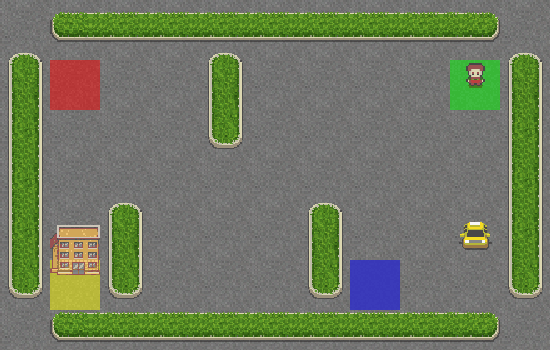

In [20]:
import imageio
from IPython.display import Image

# Generate frames by running the agent in the environment
# Assuming you have a gym environment called 'env'

frames = []
state, _ = env.reset()  # For Gym >=0.26, reset returns (obs, info)
done = False

while not done:
    # Render the environment and append the frame
    frame = env.render()  # No 'mode' argument in Gym >=0.26, returns rgb_array if render_mode='rgb_array'
    frames.append(frame)
    
    # Select action (using random policy as agent is not defined)
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)  # For Gym >=0.26
    done = terminated or truncated

env.close()

# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5, loop=0)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path)